# 2) Analyze source collection and target file

This notebook includes the code to analyze the collection of sounds compiled in the previous notebook and that will be later used as the source collection in our audio mosaicing code. The notebook also contains the code to analyze the target audio file that will be later reconstructed using sound chunks from the source collection.

The audio analysis carried out in this notebook uses the Pythonn bindings of the Essentia library which was introduced in the first session of AMPLAB. Please make sure you checked the [Essentia Python tutorial](https://essentia.upf.edu/documentation/essentia_python_tutorial.html) to get familiarized with using Essentia in Python. Also useful is to always have a browser tab opened with Essentia's [Algorithms Reference](https://essentia.upf.edu/documentation/algorithms_reference.html) documentation page.

In [52]:
import pandas as pd
import essentia
import essentia.standard as estd
import matplotlib.pyplot as plt
from IPython.display import display, Audio

In [53]:
# object to use for label encoding string features
keys_and_scales = {
    "scale": {
        "major": 0,
        "minor": 1
    },
    "key": {
        "C": 0,
        "C#": 1,
        "Db": 1,
        "D": 2,
        "D#": 3,
        "Eb": 3,
        "E": 4,
        "F": 5,
        "F#": 6,
        "Gb": 6,
        "G": 7,
        "G#": 8,
        "Ab": 8,
        "A": 9,
        "A#": 10,
        "Bb": 10,
        "B": 11
    }
}


In [54]:
# Define here our sound analysis function
# NOTE: remember that if you update this function and want to run a new analysis you'll need to re-run both 
# this cell and the cells below that carry out the audio analysis and that call the analysis function. 
# After analyzing the source collection or the target file, make sure to correct descriptors have been 
# extracted by checking the DataFrame contents. DataFrame contents can be printed on screen as a table 
# using 'display(data_frame_object)'

def analyze_sound(audio_path, beat_positions, audio_id=None):
    
    analysis_output = []  # Here we'll store the analysis results for each chunk (frame) of the audio file
    
    loader = estd.MonoLoader(filename=audio_path)
    audio = loader()
    
    frame_start_samples = beat_positions
    frame_start_end_samples = zip(frame_start_samples[:-1], frame_start_samples[1:])
    
    # Iterate over audio frames and analyze each one
    for count, (fstart, fend) in enumerate(frame_start_end_samples):
        break_loop = False
        # Get corresponding audio chunk and initialize dictionary to sotre analysis results with some basic metadata
        if (fend-fstart) % 2 != 0:
            fend -= 1
        if fend > len(audio):
            break
        else: 
            frame = audio[fstart:fend]
        
        frame_output = {
            'freesound_id': audio_id,
            'id': '{0}_f{1}'.format(audio_id, count),
            'path': audio_path,
            'start_sample': fstart,
            'end_sample': fend,
        }
        
        # Extract loudness
        loudness_algo = estd.Loudness()
        loudness = loudness_algo(frame)
        frame_output['loudness'] = loudness / len(frame)  # Normnalize by length of frame

        # Extract MFCC coefficients
        w_algo = estd.Windowing(type = 'hann')
        spectrum_algo = estd.Spectrum()
        mfcc_algo = estd.MFCC()
        spec = spectrum_algo(w_algo(frame))
        _, mfcc_coeffs = mfcc_algo(spec)
        frame_output.update({'mfcc_{0}'.format(j): mfcc_coeffs[j] for j in range(0, len(mfcc_coeffs))})
        
        # Extract other features here and add to 'frame_output' dictionary
        # adding key, scale, and key_strength
        key_algo = estd.KeyExtractor()
        key, scale, key_strength = key_algo(frame)
        
        frame_output['key'] = keys_and_scales['key'][key]
        frame_output['scale'] = keys_and_scales['scale'][scale]
        frame_output['key_strength'] = key_strength
        
        # Add frame analysis results to output
        analysis_output.append(frame_output)
    return analysis_output

## Analyze the target sound file

Analyzing target sound 126095__xserra__istanbul-sazendeleri-6.wav
Saved target dataframe with 61 entries! dataframe_target.csv


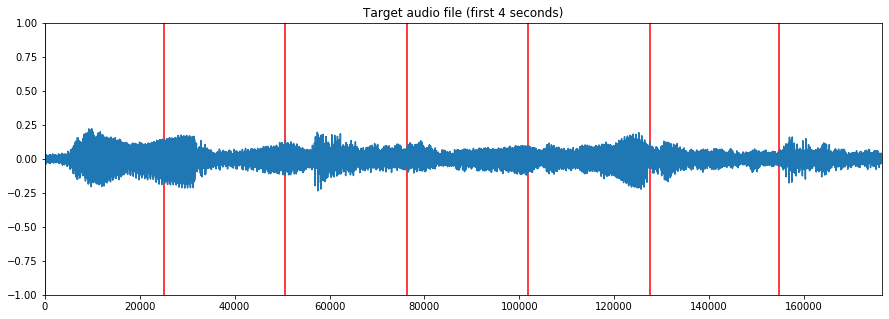

,end_sample,freesound_id,id,key,key_strength,loudness,mfcc_0,mfcc_1,mfcc_10,mfcc_11,...,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,path,scale,start_sample
0,25088,126095,126095_f0,2,0.892239,0.000985,-879.120117,118.606110,22.722403,-4.058550,...,-33.504230,-30.099758,-28.731119,-10.013870,-4.297363,-13.855297,-17.356337,126095__xserra__istanbul-sazendeleri-6.wav,1,0
1,50688,126095,126095_f1,2,0.890945,0.000814,-930.635193,168.837799,7.736679,-8.764282,...,-42.134148,-25.358753,-17.478359,-4.454735,-4.665607,-5.018600,-5.920116,126095__xserra__istanbul-sazendeleri-6.wav,0,25088
2,76288,126095,126095_f2,2,0.741684,0.000648,-916.882507,194.588181,-10.899006,-1.492855,...,-20.136086,-15.457523,2.217705,11.459862,6.388823,-5.576778,-23.320881,126095__xserra__istanbul-sazendeleri-6.wav,1,50688
3,101888,126095,126095_f3,2,0.794109,0.000467,-953.945618,156.409424,-9.518900,4.758129,...,-25.679634,-25.215767,-5.602257,-1.047764,10.606131,-3.322739,-7.259514,126095__xserra__istanbul-sazendeleri-6.wav,0,76288
4,127488,126095,126095_f4,2,0.829265,0.000921,-938.151184,156.628754,18.720280,19.400835,...,-45.231270,-31.435795,-27.024212,-0.651894,8.684559,4.672222,0.405315,126095__xserra__istanbul-sazendeleri-6.wav,1,101888
5,154624,126095,126095_f5,2,0.705353,0.000399,-961.740417,167.696930,6.239132,10.253410,...,-37.971992,-27.935421,-8.363609,6.759571,9.734568,-5.106049,-9.464607,126095__xserra__istanbul-sazendeleri-6.wav,1,127488
6,180736,126095,126095_f6,2,0.807262,0.000431,-959.868042,180.004272,0.265072,4.230286,...,-18.247173,-12.208935,6.446800,12.513157,6.542076,-6.374535,-9.799599,126095__xserra__istanbul-sazendeleri-6.wav,1,154624
7,207872,126095,126095_f7,2,0.758201,0.000233,-989.098572,150.874390,4.136700,11.922592,...,-27.587105,-23.537884,0.304840,11.104237,5.603691,-6.462936,-7.850464,126095__xserra__istanbul-sazendeleri-6.wav,1,180736
8,234496,126095,126095_f8,7,0.684951,0.000805,-965.996338,163.229248,-5.469391,2.089504,...,-36.512466,-34.851837,-22.014435,-10.750839,-7.340210,-3.809875,-5.599651,126095__xserra__istanbul-sazendeleri-6.wav,0,207872
9,261632,126095,126095_f9,9,0.834358,0.000647,-952.435974,177.201385,-13.883718,-10.893394,...,-3.693920,-10.294724,-14.014656,-3.775219,10.329370,10.880527,-3.069183,126095__xserra__istanbul-sazendeleri-6.wav,1,234496


,end_sample,key,key_strength,loudness,mfcc_0,mfcc_1,mfcc_10,mfcc_11,mfcc_12,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,scale,start_sample
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,7.775517e+05,4.901639,0.741053,0.000724,-944.269276,160.889373,-7.864768,-4.361029,-7.718045,44.035577,-22.388784,-15.212862,-13.319633,-3.919890,2.561121,-1.614689,-11.248834,0.672131,7.529506e+05
std,4.360580e+05,3.453042,0.112555,0.000442,39.644243,33.619023,11.197985,11.047887,9.800515,19.963942,17.874389,14.418600,11.467415,11.869398,8.144668,9.243400,7.592711,0.473333,4.369126e+05
min,2.508800e+04,0.000000,0.361380,0.000085,-1039.929565,54.811619,-33.174736,-20.720024,-34.368137,5.723946,-75.199158,-64.743530,-39.828110,-34.899185,-24.472090,-19.908592,-27.165249,0.000000,0.000000e+00
25%,4.167680e+05,2.000000,0.691821,0.000399,-965.996338,150.874390,-14.786657,-12.908951,-14.569057,31.495348,-34.517067,-25.358753,-21.817753,-11.217501,-1.445877,-6.799913,-17.356337,0.000000,3.911680e+05
50%,7.823360e+05,4.000000,0.768682,0.000648,-945.549377,167.696930,-10.899006,-7.129074,-8.082073,40.123230,-22.948162,-15.457523,-13.428268,-6.302567,3.518929,-2.742062,-10.283955,1.000000,7.562240e+05
75%,1.147392e+06,9.000000,0.819794,0.000878,-927.413635,185.024933,-2.500446,2.089504,-0.004242,53.051304,-11.052624,-7.020035,-7.973701,3.059246,7.776667,3.982334,-5.555878,1.000000,1.123840e+06
max,1.500672e+06,11.000000,0.903820,0.002059,-798.535034,213.340698,23.287815,26.229343,21.547680,110.210556,31.118580,23.540249,11.453804,22.205616,19.623102,22.883060,2.340218,1.000000,1.477120e+06


In [69]:
TARGET_SOUND_PATH = '126095__xserra__istanbul-sazendeleri-6.wav'  # Filename of the target audio we'll reconstruct
DATAFRAME_TARGET_FILE_FILENAME = 'dataframe_target.csv'  # DataFrame file where to store the analysis results of the target audio

loader = estd.MonoLoader(filename=TARGET_SOUND_PATH)
audio = loader()
beat_tracker_algo = estd.BeatTrackerDegara()
beat_positions = beat_tracker_algo(audio)
beat_positions = [int(round(position * 44100)) for position in beat_positions]
beat_positions.insert(0, 0)

# Analyze the target audio file and store results in a new DataFrame
print('Analyzing target sound {0}'.format(TARGET_SOUND_PATH))
target_analysis = analyze_sound(TARGET_SOUND_PATH, beat_positions, audio_id=TARGET_SOUND_PATH.split('__')[0])
df_target = pd.DataFrame(target_analysis)
df_target.to_csv(DATAFRAME_TARGET_FILE_FILENAME)
print('Saved target dataframe with {0} entries! {1}'.format(len(df_target), DATAFRAME_TARGET_FILE_FILENAME))


# Plot target audio file waveform and show ticks at the start samples of the chunks
plt.figure(figsize=(15,5))
plt.plot(audio)
plt.vlines(df_target['start_sample'].values, -1, 1, color='red')
plt.axis([0, min(len(audio), 44100 * 4), -1, 1])
plt.title('Target audio file (first 4 seconds)')
plt.show()

display(df_target)  # Show data frame contents
df_target.describe()  # Show statistics of numerical fields in data frame

## Analyze source collection

In [70]:
DATAFRAME_FILENAME = 'dataframe.csv'  # DataFrame file of the sound source collection to analyze
DATAFRAME_SOURCE_FILENAME = 'dataframe_source.csv'  # DataFrame file where to store the results of our analysis

# Load the DataFrame of the sound source collection created in previous notebook and analyze all sound files in it
df = pd.read_csv(open(DATAFRAME_FILENAME), index_col=0)
analyses = []
for i in range(0, len(df)):
    sound = df.iloc[i]  # Get DataFrame sound at position 'i'
    print('Analyzing sound with id {0} [{1}/{2}]'.format(sound['freesound_id'], i + 1, len(df)))
    analysis_output = analyze_sound(sound['path'], beat_positions, audio_id=sound['freesound_id'])  # Split audio in chunks of 200ms (44100/5 samples)
    analyses += analysis_output

# Store analysis results in a new Pandas DataFrame and save it
df_source = pd.DataFrame(analyses)
df_source.to_csv(DATAFRAME_SOURCE_FILENAME)
print('Saved source DataFrame with {0} entries! {1}'.format(len(df_source), DATAFRAME_SOURCE_FILENAME))

display(df_source)  # Show DataFrane contents
df_source.describe()  # Show some statistics of numerical fields in the DataFrame

Analyzing sound with id 218801 [1/41]
Analyzing sound with id 15834 [2/41]
Analyzing sound with id 244022 [3/41]
Analyzing sound with id 13771 [4/41]
Analyzing sound with id 13770 [5/41]
Analyzing sound with id 4266 [6/41]
Analyzing sound with id 58305 [7/41]
Analyzing sound with id 388100 [8/41]
Analyzing sound with id 120988 [9/41]
Analyzing sound with id 340087 [10/41]
Analyzing sound with id 40189 [11/41]
Analyzing sound with id 42158 [12/41]
Analyzing sound with id 348392 [13/41]
Analyzing sound with id 329736 [14/41]
Analyzing sound with id 173724 [15/41]
Analyzing sound with id 328718 [16/41]
Analyzing sound with id 237797 [17/41]
Analyzing sound with id 444012 [18/41]
Analyzing sound with id 441535 [19/41]
Analyzing sound with id 356245 [20/41]
Analyzing sound with id 356439 [21/41]
Analyzing sound with id 64940 [22/41]
Analyzing sound with id 13797 [23/41]
Analyzing sound with id 84353 [24/41]
Analyzing sound with id 318189 [25/41]
Analyzing sound with id 543914 [26/41]
Analyz

,end_sample,freesound_id,id,key,key_strength,loudness,mfcc_0,mfcc_1,mfcc_10,mfcc_11,...,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,path,scale,start_sample
0,25088,218801,218801_f0,7,0.612266,0.000027,-1116.869873,30.081432,8.931309,7.352333,...,27.096699,24.728901,21.991653,19.070988,16.152781,13.405430,10.966120,files/218801_3908940-hq.ogg,0,0
1,50688,218801,218801_f1,9,0.752053,0.000155,-1088.296875,67.392220,7.085537,7.650230,...,45.984272,34.133549,24.525970,17.574055,12.747698,9.476871,7.590792,files/218801_3908940-hq.ogg,1,25088
2,76288,218801,218801_f2,2,0.312477,0.000051,-1085.740356,67.479836,5.799099,4.382362,...,29.573719,13.320740,4.216698,1.870716,3.722015,6.284122,6.996752,files/218801_3908940-hq.ogg,1,50688
3,101888,218801,218801_f3,2,0.824025,0.001181,-952.513000,190.364380,-7.727015,-3.402260,...,37.722736,18.286819,-6.276176,-16.245270,-14.953621,-10.935509,-8.726242,files/218801_3908940-hq.ogg,1,76288
4,127488,218801,218801_f4,2,0.817697,0.001482,-845.501526,200.454529,-10.790403,-18.796890,...,22.222294,10.374573,-10.909477,-11.255188,-7.584473,-7.045853,-4.413055,files/218801_3908940-hq.ogg,1,101888
5,154624,218801,218801_f5,2,0.817490,0.001562,-818.525879,182.739059,-6.570927,-24.915874,...,30.555645,10.381512,-10.163216,-22.918575,-1.470680,3.953350,-8.062473,files/218801_3908940-hq.ogg,1,127488
6,180736,218801,218801_f6,2,0.717767,0.001482,-854.698120,181.312744,-12.577486,-12.042496,...,2.316807,-8.481567,-16.991196,-20.905212,-6.867188,-1.803375,0.287491,files/218801_3908940-hq.ogg,1,154624
7,207872,218801,218801_f7,2,0.839336,0.002194,-859.571655,197.321960,-19.161861,-3.637081,...,8.129105,-2.330692,-17.013508,-2.170521,-16.795727,-13.542789,-12.429489,files/218801_3908940-hq.ogg,1,180736
8,234496,218801,218801_f8,2,0.883265,0.001950,-891.665771,207.651733,-6.708101,-6.472237,...,21.982731,8.048569,-7.284950,-16.634857,-10.326088,-6.044258,-9.133400,files/218801_3908940-hq.ogg,1,207872
9,261632,218801,218801_f9,2,0.866701,0.001937,-870.230164,210.496552,-13.988386,-12.906631,...,19.923054,4.895386,-5.442154,-18.409248,-7.895309,7.775295,-10.937920,files/218801_3908940-hq.ogg,1,234496


,end_sample,freesound_id,key,key_strength,loudness,mfcc_0,mfcc_1,mfcc_10,mfcc_11,mfcc_12,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,scale,start_sample
count,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,7.360000e+02
mean,4.068035e+05,256854.290761,3.672554,0.689937,0.002452,-861.205245,119.153863,-1.683331,-0.110238,0.945391,-22.709763,3.166664,-9.673942,-9.676128,-9.924990,-3.690775,-5.821612,-4.205505,0.653533,3.814706e+05
std,2.969582e+05,146199.412741,3.220700,0.263265,0.003176,155.200256,63.083305,12.361195,11.574205,10.951805,59.328783,40.801535,23.059222,18.739848,16.909863,12.096416,12.384820,10.303972,0.476168,2.975378e+05
min,2.508800e+04,4266.000000,0.000000,-1.000000,0.000000,-1138.420044,-1.629719,-36.380394,-29.911526,-30.831089,-195.393158,-107.216820,-84.736938,-64.843872,-60.509048,-43.466064,-37.167511,-43.394051,0.000000,0.000000e+00
25%,1.546240e+05,157322.000000,2.000000,0.618374,0.000394,-985.220749,76.088329,-9.172304,-6.635190,-5.609547,-66.109877,-26.427513,-27.334702,-20.769432,-21.813393,-10.733284,-14.006258,-10.892294,0.000000,1.274880e+05
50%,3.394560e+05,327666.000000,2.000000,0.755497,0.001262,-861.001801,118.438099,-2.943239,-0.313332,-0.000038,-22.810173,3.950184,-5.807077,-8.271736,-10.614817,-3.565361,-5.218075,-4.071169,1.000000,3.133440e+05
75%,6.092800e+05,356245.000000,5.000000,0.837264,0.002737,-725.910172,168.473183,3.447827,4.543991,5.318596,11.947821,39.041945,6.279891,4.468512,2.217499,3.621210,3.364937,2.901529,1.000000,5.857280e+05
max,1.315328e+06,543914.000000,11.000000,0.977248,0.018368,-497.415955,253.530518,48.281597,64.280212,52.311634,128.282043,81.144508,49.747364,53.679169,42.766075,32.996758,43.506527,24.413343,1.000000,1.292288e+06
